C:\Users\Carolina\AppData\Local\Temp\ipykernel_8596\1256894590.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sent_counts.index, y=sent_counts.values, palette="Set2")


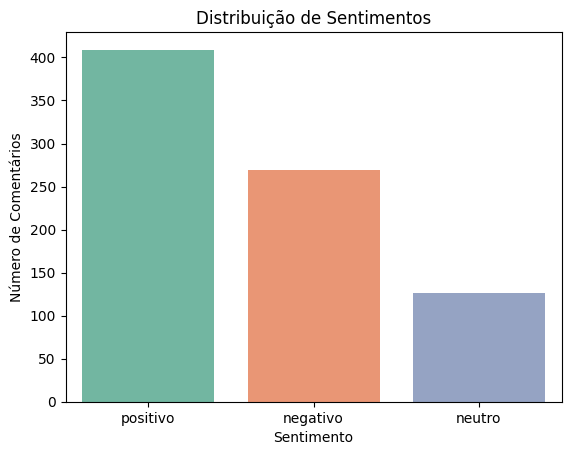

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# carregar CSV processado
df = pd.read_csv("../saidas/Output_reddit_CSV.csv")

# contagem de sentimentos
sent_counts = df["sentimento"].value_counts()

# gráfico de barras
sns.barplot(x=sent_counts.index, y=sent_counts.values, palette="Set2")
plt.title("Distribuição de Sentimentos")
plt.xlabel("Sentimento")
plt.ylabel("Número de Comentários")
plt.show()


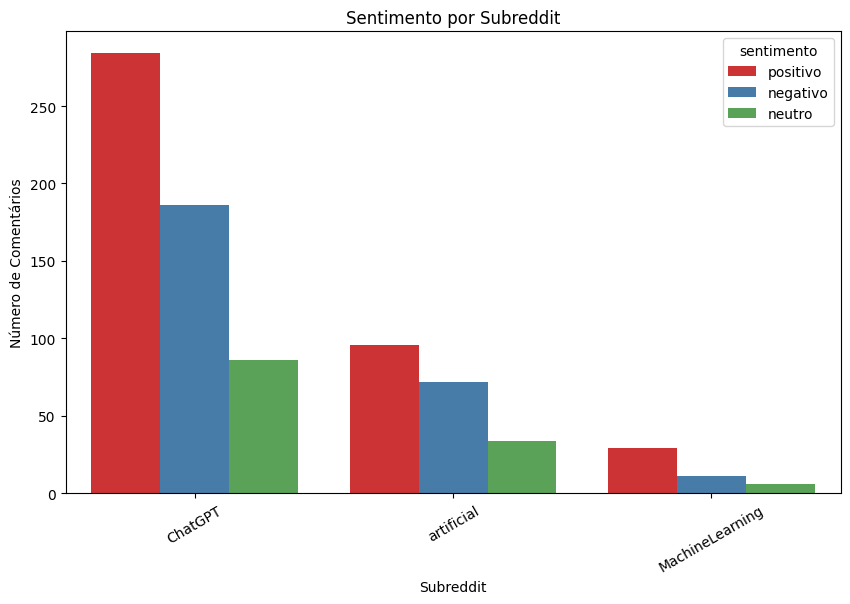

In [2]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="subreddit", hue="sentimento", palette="Set1")
plt.title("Sentimento por Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Número de Comentários")
plt.xticks(rotation=30)
plt.show()



--- Linha 1 ---
Daaaamn         → INTJ
,               → PUNCT
do              → AUX
n't             → PART
play            → VERB
with            → ADP
my              → PRON
heart           → NOUN
like            → ADP
this            → PRON
!               → PUNCT
Haha            → PROPN

               → SPACE
But             → CCONJ
seriously       → ADV
,               → PUNCT
ai              → VERB
will            → AUX
make            → VERB
any             → DET
movie           → NOUN
possible        → ADJ
🤩               → PROPN
with            → ADP
cast            → NOUN
members         → NOUN
that            → PRON
actually        → ADV
look            → VERB
like            → ADP
the             → DET
original        → ADJ
material        → NOUN

--- Linha 2 ---
This            → PRON
was             → AUX
amazing         → ADJ
you             → PRON
could           → AUX
immediately     → ADV
tell            → VERB
where           → SCONJ
they            → PRON
were    

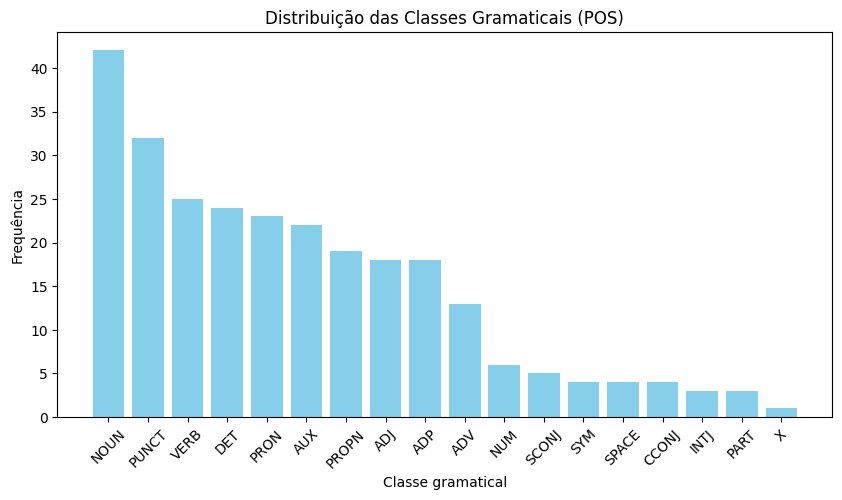

In [6]:
import pandas as pd
import spacy

# carregar modelo do spaCy
nlp = spacy.load("en_core_web_sm")  # para inglês
# se quiser português: nlp = spacy.load("pt_core_news_sm")

# carregar o CSV
df = pd.read_csv("../saidas/Output_reddit_CSV.csv")

# pegar apenas as 10 primeiras linhas
amostra = df.head(10)["comment"]

# analisar cada comentário
for i, comentario in enumerate(amostra, 1):
    doc = nlp(str(comentario))
    print(f"\n--- Linha {i} ---")
    for token in doc:
        print(f"{token.text:<15} → {token.pos_}")
linhas = []

for i, comentario in enumerate(amostra, 1):
    doc = nlp(str(comentario))
    for token in doc:
        linhas.append({
            "linha": i,
            "palavra": token.text,
            "classe_gramatical": token.pos_
        })

df_pos = pd.DataFrame(linhas)
print(df_pos.head(20))  # mostra as primeiras 20 linhas

import matplotlib.pyplot as plt

# Contagem das classes gramaticais
contagem_pos = df_pos["classe_gramatical"].value_counts()

# Gráfico de barras
plt.figure(figsize=(10,5))
plt.bar(contagem_pos.index, contagem_pos.values, color="skyblue")
plt.title("Distribuição das Classes Gramaticais (POS)")
plt.xlabel("Classe gramatical")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.show()




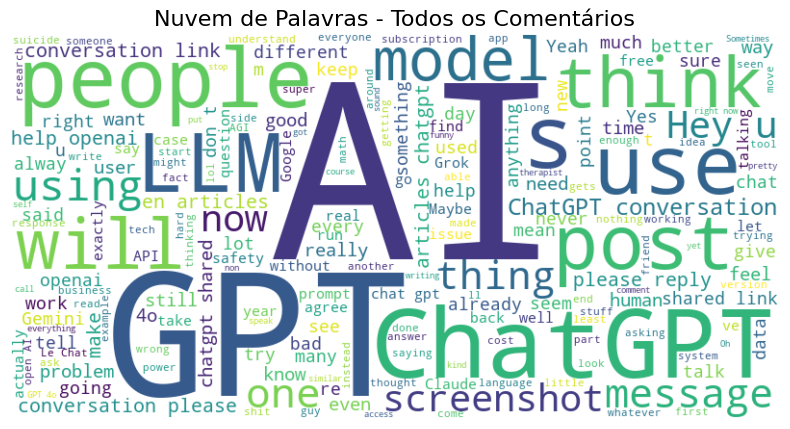

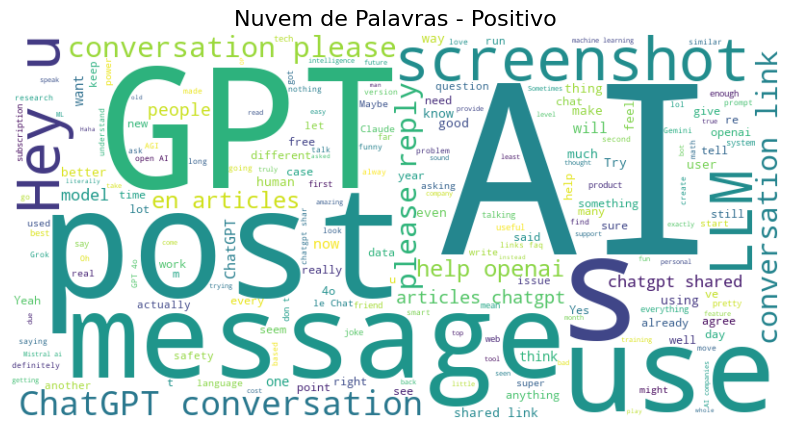

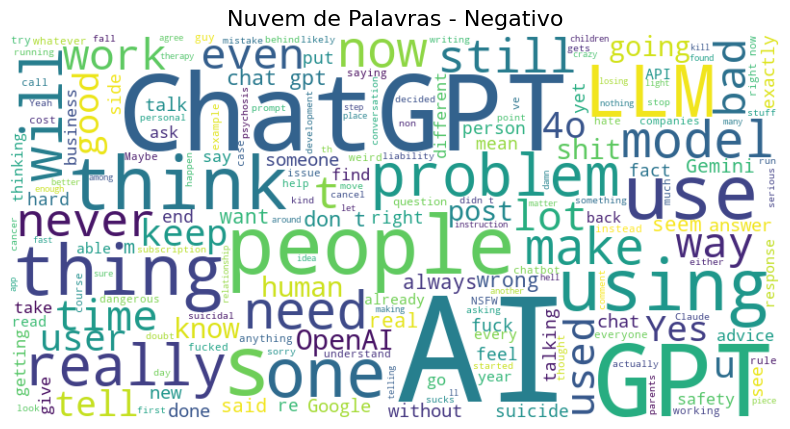

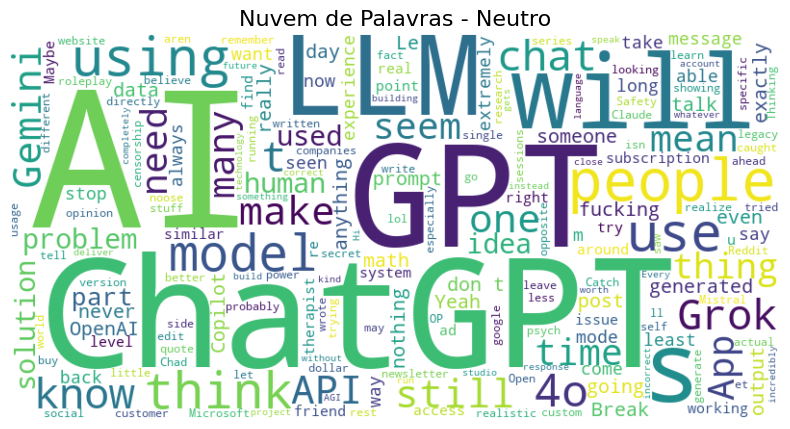

In [4]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# carregar CSV
df = pd.read_csv("../saidas/Output_reddit_CSV.csv")

# palavras de stop em inglês + português
stopwords = set(STOPWORDS)
stopwords.update(["https", "http", "com", "www"])  # remove links inúteis

# função para gerar nuvem
def gerar_wordcloud(texto, titulo):
    wordcloud = WordCloud(
        width=800, height=400,
        background_color="white",
        stopwords=stopwords,
        colormap="viridis"  # você pode trocar: "plasma", "coolwarm", "inferno" etc.
    ).generate(" ".join(texto))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(titulo, fontsize=16)
    plt.show()

# nuvem geral (todos os comentários)
gerar_wordcloud(df["comment"].astype(str), "Nuvem de Palavras - Todos os Comentários")

# nuvem para cada sentimento
for sentimento in df["sentimento"].unique():
    subset = df[df["sentimento"] == sentimento]["comment"].astype(str)
    gerar_wordcloud(subset, f"Nuvem de Palavras - {sentimento.capitalize()}")
